In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data=pd.read_csv('Churn_Modelling.csv')

In [3]:
Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
len(Data.columns)

14

In [5]:
x=Data.iloc[:,3:13]
y=Data.iloc[:,13]

In [6]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
Geo=pd.get_dummies(Data['Geography'],drop_first=True)

In [9]:
Geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
Gen=pd.get_dummies(Data['Gender'],drop_first=True)

In [11]:
Gen

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
Data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
x=pd.concat([x,Geo,Gen],axis=1)

In [14]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
x=x.drop(['Geography','Gender'],axis=1)

In [16]:
X=x.values
X

array([[619.,  42.,   2., ...,   0.,   0.,   0.],
       [608.,  41.,   1., ...,   0.,   1.,   0.],
       [502.,  42.,   8., ...,   0.,   0.,   0.],
       ...,
       [709.,  36.,   7., ...,   0.,   0.,   0.],
       [772.,  42.,   3., ...,   1.,   0.,   1.],
       [792.,  28.,   4., ...,   0.,   0.,   0.]])

In [17]:
Y=y.values
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
# Feature Scaling:(Bring the Features to the Same Scale)
from sklearn.preprocessing import MinMaxScaler

In [21]:
Scaler=MinMaxScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

In [22]:
x_train

array([[0.634     , 0.22857143, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.154     , 0.34285714, 0.1       , ..., 1.        , 0.        ,
        1.        ],
       [0.37      , 0.15714286, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.776     , 0.24285714, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.48      , 0.28571429, 0.9       , ..., 0.        , 1.        ,
        0.        ],
       [0.546     , 0.42857143, 0.1       , ..., 1.        , 0.        ,
        0.        ]])

In [36]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [38]:
x_test

array([[0.494     , 0.24285714, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.346     , 0.31428571, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.712     , 0.34285714, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.456     , 0.25714286, 0.1       , ..., 0.        , 1.        ,
        1.        ],
       [0.6       , 0.22857143, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.446     , 0.17142857, 0.8       , ..., 1.        , 0.        ,
        1.        ]])

In [39]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
Model=Sequential()

In [27]:
# Units=6(We are creating 6 Hidden Neurons )
# Kernel_Initializer='he_uniform'(Weight Initailizer)
# Activalion='relu'(Activation Function)
# Input_Dimensions=11(11 Inputs are connected to Hidden Layer i.e'x')
# Last Unit=1(One Hidden Neuran(Output Neuron) i.e Binary Classification)
# All the Activation Functions should be 'relu' or 'Leaky relu'

In [28]:
# Glorot Uniform/Normal:ReLu
# He Uniform/Normal:Sigmoid
Model.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=11))
Model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
Model.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))
Model.compile(optimizer='adam',loss='binary_crossentropy')

In [29]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [32]:
Model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=10,epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 5s 594us/sample - loss: 0.5565 - val_loss: 0.4991
Epoch 2/100
8000/8000 [==============================] - 3s 437us/sample - loss: 0.4835 - val_loss: 0.4628
Epoch 3/100
8000/8000 [==============================] - 3s 437us/sample - loss: 0.4575 - val_loss: 0.4438
Epoch 4/100
8000/8000 [==============================] - 3s 434us/sample - loss: 0.4408 - val_loss: 0.4330
Epoch 5/100
8000/8000 [==============================] - 3s 396us/sample - loss: 0.4319 - val_loss: 0.4249
Epoch 6/100
8000/8000 [==============================] - 3s 393us/sample - loss: 0.4270 - val_loss: 0.4206
Epoch 7/100
8000/8000 [==============================] - 3s 381us/sample - loss: 0.4230 - val_loss: 0.4246
Epoch 8/100
8000/8000 [==============================] - 4s 445us/sample - loss: 0.4185 - val_loss: 0.4146
Epoch 9/100
8000/8000 [==============================] - 3s 386us/sample - loss: 0.4146 - val_lo

8000/8000 [==============================] - 4s 478us/sample - loss: 0.3480 - val_loss: 0.3399
Epoch 77/100
8000/8000 [==============================] - 3s 412us/sample - loss: 0.3476 - val_loss: 0.3411
Epoch 78/100
8000/8000 [==============================] - 4s 488us/sample - loss: 0.3466 - val_loss: 0.3421
Epoch 79/100
8000/8000 [==============================] - 4s 484us/sample - loss: 0.3475 - val_loss: 0.3489
Epoch 80/100
8000/8000 [==============================] - 4s 470us/sample - loss: 0.3474 - val_loss: 0.3425
Epoch 81/100
8000/8000 [==============================] - 4s 447us/sample - loss: 0.3466 - val_loss: 0.3426
Epoch 82/100
8000/8000 [==============================] - 4s 477us/sample - loss: 0.3466 - val_loss: 0.3431
Epoch 83/100
8000/8000 [==============================] - 4s 532us/sample - loss: 0.3474 - val_loss: 0.3567
Epoch 84/100
8000/8000 [==============================] - 4s 441us/sample - loss: 0.3481 - val_loss: 0.3506
Epoch 85/100
8000/8000 [=================

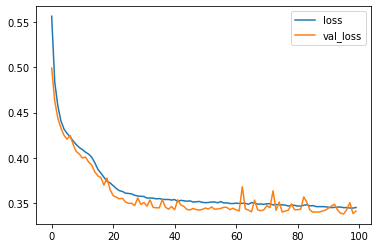

In [33]:
Model_Loss=pd.DataFrame(Model.history.history)
Model_Loss.plot()

In [34]:
Model.fit(X,Y,validation_split=0.2,batch_size=10,epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 395us/sample - loss: 4519.8719 - val_loss: 806.1641
Epoch 2/100
8000/8000 [==============================] - 3s 364us/sample - loss: 495.4861 - val_loss: 476.9636
Epoch 3/100
8000/8000 [==============================] - 3s 431us/sample - loss: 375.8376 - val_loss: 353.3046
Epoch 4/100
8000/8000 [==============================] - 3s 352us/sample - loss: 327.6528 - val_loss: 126.7895
Epoch 5/100
8000/8000 [==============================] - 3s 347us/sample - loss: 363.3637 - val_loss: 252.9114
Epoch 6/100
8000/8000 [==============================] - 3s 394us/sample - loss: 300.8948 - val_loss: 369.7616
Epoch 7/100
8000/8000 [==============================] - 3s 385us/sample - loss: 311.1722 - val_loss: 294.3374
Epoch 8/100
8000/8000 [==============================] - 3s 378us/sample - loss: 284.8586 - val_loss: 187.4158
Epoch 9/100
8000/8000 [==============================] - 3s 387

Epoch 74/100
8000/8000 [==============================] - 4s 455us/sample - loss: 279.2248 - val_loss: 85.9921
Epoch 75/100
8000/8000 [==============================] - 3s 388us/sample - loss: 255.2517 - val_loss: 158.8978
Epoch 76/100
8000/8000 [==============================] - 3s 392us/sample - loss: 230.3741 - val_loss: 249.1601
Epoch 77/100
8000/8000 [==============================] - 4s 486us/sample - loss: 210.8534 - val_loss: 225.5617
Epoch 78/100
8000/8000 [==============================] - 4s 496us/sample - loss: 229.5198 - val_loss: 102.8731
Epoch 79/100
8000/8000 [==============================] - 3s 430us/sample - loss: 215.7275 - val_loss: 179.7324
Epoch 80/100
8000/8000 [==============================] - 3s 392us/sample - loss: 251.3988 - val_loss: 138.0485
Epoch 81/100
8000/8000 [==============================] - 4s 456us/sample - loss: 209.7540 - val_loss: 354.4925
Epoch 82/100
8000/8000 [==============================] - 4s 520us/sample - loss: 226.1470 - val_loss: 10

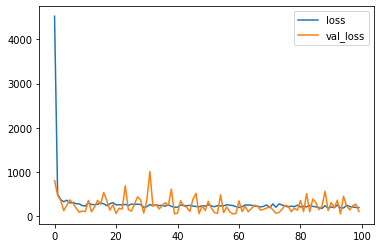

In [35]:
Model_Loss1=pd.DataFrame(Model.history.history)
Model_Loss1.plot()